#  Assignment 1
You are given $n$ documents (labels $\in \{-1,+1\}$), each consisting of $n_i$ words from some finite vocabulary $\mathsf{V=\{v_1,v_2,\dots,v_d\}}$ with size $d$.
We represent document $i$ by a vector 
$$
    \mathsf{\mathbf{x_i} = \begin{pmatrix} \mathsf{x_{i1}, x_{i2},\dots,x_{id},1 }\end{pmatrix}}
$$ where $x_{ij}=$ number of times that word $v_j$ appears in document $i$.
Now let matrix $X$ of size $n$ by $d+1$ where its $i$-th row is equal to $\mathbf{x_i}$; i.e.
$$
    \mathsf{X = \begin{pmatrix} \mathsf{x_{ij}} \end{pmatrix}_{i\in[n],j\in[d+1]}}
$$
also let vector $\mathbf{y} \in \{-1,+1\}^n$ be
$$
    \mathbf{y}=\begin{pmatrix} \mathsf{y_1 \\
                                   y_2 \\
                                   \dots \\
                                   y_n}
                                   \end{pmatrix}
$$
wher $y_i$ is the label of document $i$.
### Buidling $X$ and $\mathbf{y}$
You are given two text files
1. `train.txt`: training set (labeled documents)
2. `test.txt`: test set (unlabeled documents)

in `train.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{train}}$ 
- line $2i$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{train}}$)
- line $2i+1$ contain label for document $i$    ($i=1,2,\dots,n_{\mathrm{train}}$)

in `test.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{test}}$ 
- line $i+1$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{test}}$)

Now let's build $X_\mathrm{train}$,$X_\mathrm{test}$, and $\mathbf{y}_{\mathrm{train}}$ as defined above using `train.txt` and `test.txt`

### IMPORTANT
- Documents are numbered as they appear in the input file
- let Vocabulary $V=(v_1,v_2,\dots,v_d)$ be **sorted** list of all distinct word in the documents of **training** set.

In [52]:
import numpy as np

with open("train.txt", "r") as file:
    n_train = int(file.readline().strip()) 
    train_lines = file.readlines()

docs_train = [train_lines[i].split() for i in range(0, 2 * n_train, 2)]
labels = [int(train_lines[i].strip()) for i in range(1, 2 * n_train, 2)]

with open("test.txt", "r") as file:
    n_test = int(file.readline().strip())  
    docs_test = [file.readline().split() for _ in range(n_test)]

vocabulary = sorted(set(word for doc in docs_train for word in doc))

X_train = np.zeros((n_train, len(vocabulary) + 1))

for i, doc in enumerate(docs_train):
    for word in doc:
        if word in vocabulary:
            j = vocabulary.index(word)
            X_train[i, j] += 1

X_train[:, -1] = 1

y_train = np.array(labels)

X_test = np.zeros((n_test, len(vocabulary) + 1))

for i, doc in enumerate(docs_test):
    for word in doc:
        if word in vocabulary:
            j = vocabulary.index(word)
            X_test[i, j] += 1

X_test[:, -1] = 1

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print(len(docs_train[1]))
print(len(docs_test[1]))

manual_sum_labels = sum(labels)
print("Sum of labels:", manual_sum_labels)

# CHECKS
assert (n_train + n_test) == 1500
assert np.sum(np.array(labels)) == -348
assert len(docs_train[1]) + len(docs_test[1]) == 12


X_train shape: (1000, 11)
y_train shape: (1000,)
X_test shape: (500, 11)
8
4
Sum of labels: -348


In [53]:
def make_vocabulary(docs):
    words = set(word for doc in docs for word in doc)
    vocab = sorted(words)
    return vocab

vocab = make_vocabulary(docs_train)
d = len(vocab) 
w2i = {vocab[i]: i for i in range(len(vocab))} 

print(vocab)
print(w2i)

# CHECKS
assert vocab[2] == "LnGi"
assert vocab == sorted(vocab)


['ITZM', 'JgwBu', 'LnGi', 'OnJECH', 'Rv', 'WAcqG', 'dZJa', 'iWgN', 'tgU', 'zY#tE']
{'ITZM': 0, 'JgwBu': 1, 'LnGi': 2, 'OnJECH': 3, 'Rv': 4, 'WAcqG': 5, 'dZJa': 6, 'iWgN': 7, 'tgU': 8, 'zY#tE': 9}


In [54]:
def make_matrix(docs, w2i):
    n = len(docs)
    d = len(w2i)
    X = np.zeros((n, d + 1))

    for i, doc in enumerate(docs):
        for word in doc:
            if word in w2i:
                j = w2i[word]
                X[i, j] += 1

    X[:, -1] = 1

    return X

X_train = make_matrix(docs_train, w2i)
X_test = make_matrix(docs_test, w2i)
y_train = np.array(labels)

print("First 5 rows of X_train: ")
print(X_train[:5, :])
print("Last 5 rows of X_test: ")
print(X_test[-5:, :])
print("First 10 labels of the training set:")
print(y_train[:10])

print("Total sum of X_train:", np.sum(X_train))
print("Total sum of X_test:", np.sum(X_test))
print("Sum of features for document 10 in both X_train and X_test:", np.sum(X_test[10, :] + X_train[10, :]))

# CHECKS
assert np.sum(X_train) == 6871
assert np.sum(X_test) == 3462
assert np.sum(X_test[10, :] + X_train[10, :]) == 11


First 5 rows of X_train: 
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
 [3. 0. 0. 0. 1. 0. 2. 0. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1. 3. 2. 1.]
 [1. 0. 0. 1. 2. 0. 2. 0. 1. 0. 1.]]
Last 5 rows of X_test: 
[[1. 0. 0. 0. 1. 0. 1. 0. 3. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 1.]
 [0. 0. 1. 0. 2. 1. 0. 0. 3. 0. 1.]
 [0. 1. 0. 1. 4. 0. 0. 2. 2. 0. 1.]
 [2. 1. 0. 1. 0. 0. 0. 2. 1. 0. 1.]]
First 10 labels of the training set:
[-1  1 -1  1 -1 -1  1 -1 -1 -1]
Total sum of X_train: 6871.0
Total sum of X_test: 3462.0
Sum of features for document 10 in both X_train and X_test: 11.0


## Linear Predictor

Let $\mathbf{w} \in \mathbb{R}^{d+1}$, for a single document $\mathbf{x} \in \mathbb{R}^{d+1}$, our predicted label is
$$
    \mathsf{\hat{y} = \mathrm{sign}({\mathbf{w} \cdot \mathbf{y}})}
$$
where 
$$
    \displaystyle  \mathrm{sign}(\alpha) = \begin{cases} 
      +1 & \alpha \geq 0 \\
      -1 & \alpha < 0 \\
    \end{cases}
$$

Therefore, for documents matrix $X \in \mathbb{R}^{n\times(d+1)}$ we predict labels $\hat{\mathbf{y}} \in \{-1,+1\}^n$
$$
    \hat{\mathbf{y}} = \mathrm{sign}(X\mathbf{w})
$$
where $\mathrm{sign()}$ here is defined to elementwise applying the sign we defined previously.

The error of our prediction over $X$ with true labels $\mathbf{y}$, is defined to be
$$
    \mathsf{\mathrm{error}=\frac{1}{n}\sum_{i=1}^{n}\ell_{01}(y_i,\hat{y}_i)}
$$
where $\displaystyle \mathsf{ \ell_{01}(y,\hat{y})= \begin{cases} 1 & y\neq\hat{y} \\ 0 & \text{otherwise}\end{cases} }$

In [55]:
def err(y, y_hat):
    n = len(y)
    error = sum(y_i != y_hat_i for y_i, y_hat_i in zip(y, y_hat)) / n
    return error

# CHECKS
assert err([-1, +1, -1, +1], [+1, +1, +1, -1]) == 0.75
assert err([+1, +1, +1, +1], [+1, +1, +1, -1]) == 0.25
assert err([-1, -1, -1, +1], [+1, +1, +1, -1]) == 1


In [56]:
def predict(X, w):
    y_hat = np.sign(X.dot(w)).reshape(-1, 1)
    return y_hat

predictions = predict(X_train, np.ones(d + 1).reshape(-1, 1))

# CHECKS
assert np.sum(predictions) == n_train


### Candidate list for $\mathbf{w}$
we give you a small candidates list `candids` of $\mathbf{w}$'s. We want you to find $\mathbf{w}^*$ in this list which gives you the smallest error over **training set**.

In [57]:
import pickle
with open('candids.pkl', 'rb') as f:
    candids = pickle.load(f)
print("size of candidates lists %d"%len(candids))
print(candids[0])

size of candidates lists 10
[[ 0.24771893]
 [ 0.0797402 ]
 [ 0.06736309]
 [ 0.12221225]
 [ 0.00692924]
 [ 0.30678176]
 [ 0.1730867 ]
 [ 0.02923004]
 [ 0.33520645]
 [ 0.06869451]
 [-0.8189899 ]]


In [58]:
err_list = []
best_index = None
smallest_error = float('inf')

for i, w_candidate in enumerate(candids):
    if w_candidate.ndim == 1:
        w_candidate = w_candidate.reshape(-1, 1)
    
    y_hat_train = predict(X_train, w_candidate)
    
    current_error = err(y_train, y_hat_train)
    
    err_list.append(current_error)
    
    if current_error < smallest_error:
        smallest_error = current_error
        best_index = i

print("Training Error of candidates:")
for i, err in enumerate(err_list):
    print(f"Candidate #{i} has error {err}")

print("Index of best predictor: %d" % best_index)
print("Best Predictor:")
print(candids[best_index])

# CHECKS
assert np.sum(err_list) <= 2.5


Training Error of candidates:
Candidate #0 has error [0.252]
Candidate #1 has error [0.273]
Candidate #2 has error [0.]
Candidate #3 has error [0.285]
Candidate #4 has error [0.29]
Candidate #5 has error [0.327]
Candidate #6 has error [0.18]
Candidate #7 has error [0.265]
Candidate #8 has error [0.223]
Candidate #9 has error [0.206]
Index of best predictor: 2
Best Predictor:
[[ 0.22045993]
 [ 0.        ]
 [ 0.        ]
 [ 0.11585252]
 [ 0.        ]
 [ 0.28635182]
 [ 0.14144608]
 [ 0.        ]
 [ 0.25414682]
 [ 0.        ]
 [-0.87828279]]


In [59]:
w_best = candids[best_index]

y_test = predict(X_test, w_best)

print("First 10 labels predicted for the test set:")
print(y_test[:10])

# CHECKS
def my_hash(y):
    p1 = 28433
    p2 = 577
    ret = 0
    for e in range(len(y)):
        ret = ((ret * p2 + int(e)) % p1 + p1) % p1
    return ret

hash_value = my_hash(y_test)
print("Hash value of predicted labels:", hash_value)
assert hash_value == 19262


First 10 labels predicted for the test set:
[[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
Hash value of predicted labels: 19262


## Frequency of words

In [62]:
! pip install matplotlib


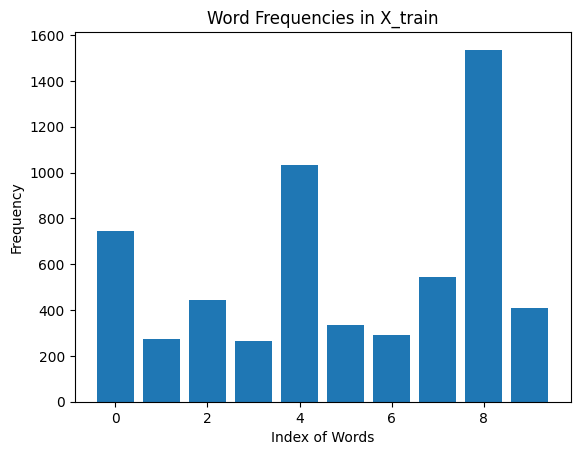

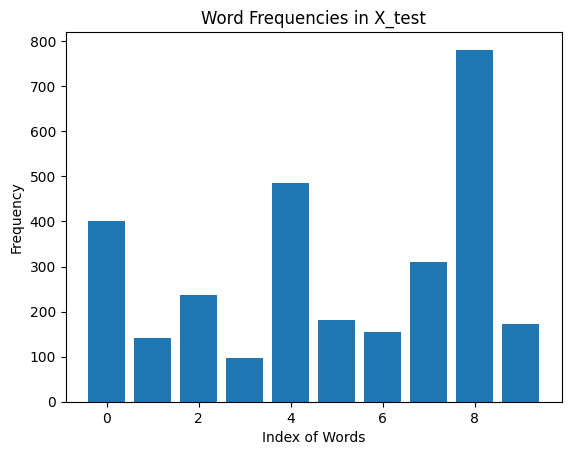

In [63]:
import matplotlib.pyplot as plt

def plot_word_frequencies(X, title):
    word_frequencies = np.sum(X[:, :-1], axis=0)
    plt.bar(range(len(word_frequencies)), word_frequencies)
    plt.title(title)
    plt.xlabel('Index of Words')
    plt.ylabel('Frequency')
    plt.show()

plot_word_frequencies(X_train, 'Word Frequencies in X_train')

plot_word_frequencies(X_test, 'Word Frequencies in X_test')
